# What drives the price of a car?

## Business Understanding 
A car dealership is a volume based business and pricing a car to match the demand is key. When there is a large supply of used cars across dealerships, it make little sense for dealers to mark up significantly. Recently due to Ukraine war and chip shortage, there was a dearth of new cars in the market. Used cars of all kinds were in demand. Timing plays a factor in the used car market, however the specific thing we are trying to find in this assignment is also, what factors within the characteristics of the car still tend to influence the price more. True, a luxury car with the same mechanical specs tends to be more expensive. Lets dive into this and learn more about the used car domain

## Data Understanding
Before looking at the dataset, here is the approach I would like to pursue:
1. Review the dataset for what attributes are included
2. Review how the columns correlate to the price using the techniques we have learned
3. Resolve quality issues - dropna, and drop columns
4. Remove columns that dont seem to have as much effect on the price
5. If there is historical pricing data for the same car before it is sold, we could do some autocorrelation to see how prices affected the sale price

In [384]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [385]:
# read data
data = pd.read_csv('data/vehicles.csv')
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [386]:
# check missing values
data.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [387]:
# show all columns
pd.set_option('display.max_columns', None)
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [388]:
# distinct values in each column
data.nunique()


id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

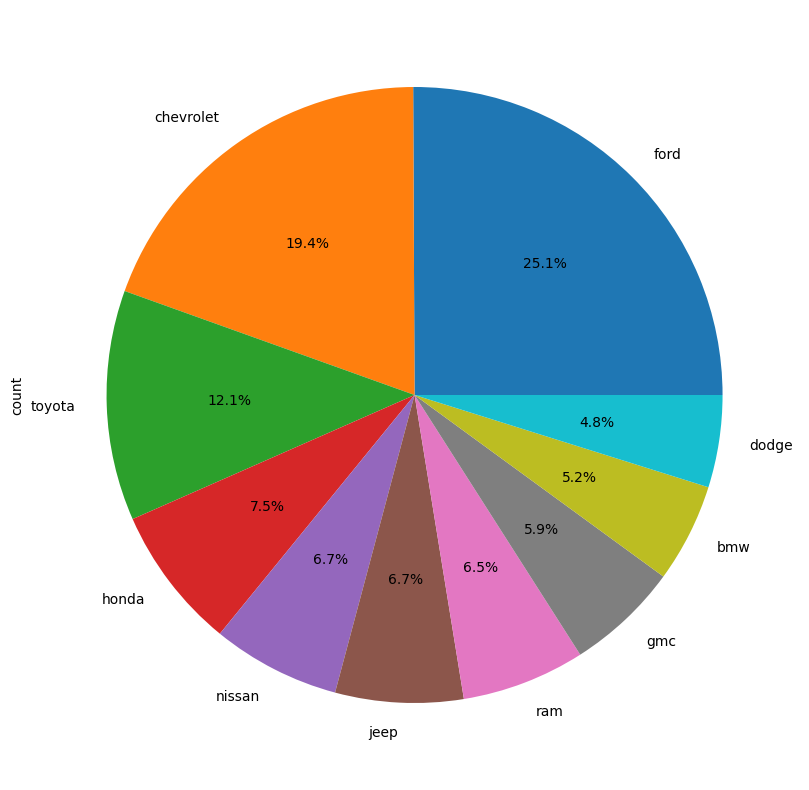

In [389]:
# pick the top 10 manufacturers by count 
top_manufacturer = data['manufacturer'].value_counts().head(10).index
data = data[data['manufacturer'].isin(top_manufacturer)]

# plot a pie chart to show the distribution of manufacturer
plt.figure(figsize=(10,10))
data['manufacturer'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [391]:
# remove outliers all cars with price > 100000
data = data.drop(data[data['price']>100000].index)

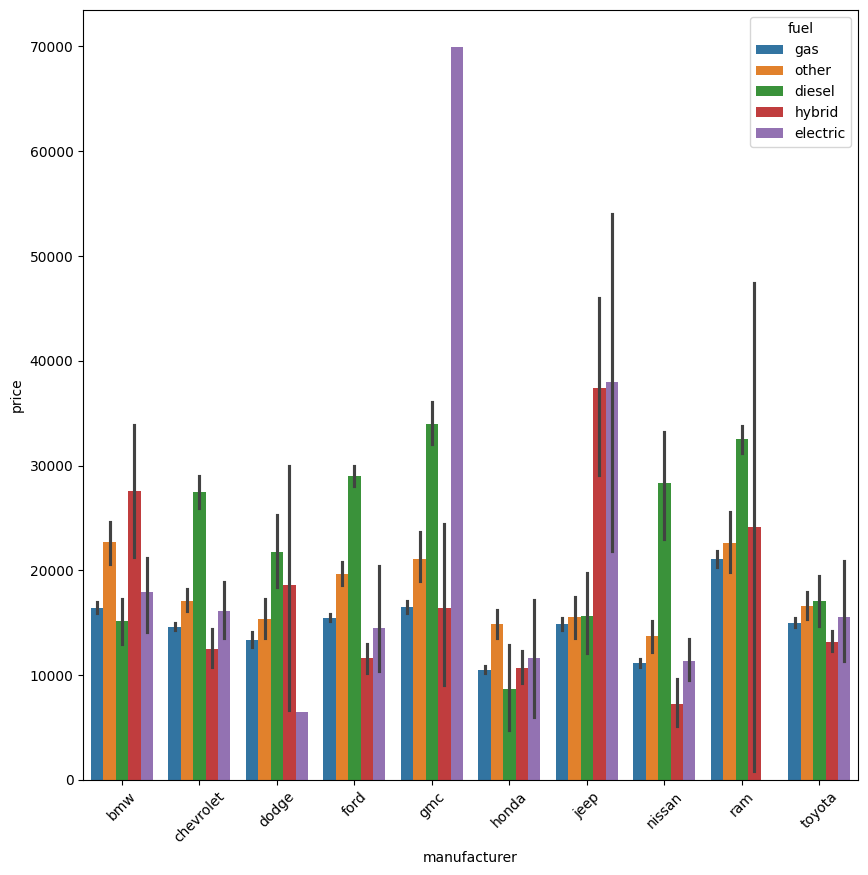

In [392]:

# For each manufacturer and model, fuel_type, list average price
avg_price = data.groupby(['manufacturer', 'model', 'year', 'fuel'])['price'].mean().reset_index()
avg_price

# pick one manufacturer and model and list the 3 fuel types and price
# avg_price[(avg_price['manufacturer']=='toyota') & (avg_price['model']=='camry')].sort_values(by='price', ascending=False).head(3)

# plot average price for fuel type, for each manufacturer
# can we plot model as well?
plt.figure(figsize=(10,10))
sns.barplot(x='manufacturer', y='price', hue='fuel', data=avg_price)
plt.xticks(rotation=45)
plt.show()


- Certain EVs are able to price higher than their other fuel powered vehicles. Such as GMC, Jeep. More analysis is needed to ensure we are comparing like alternatives such as type of vehicle etc
- Diesel powered vehicles are priced higher than their gas counterparts

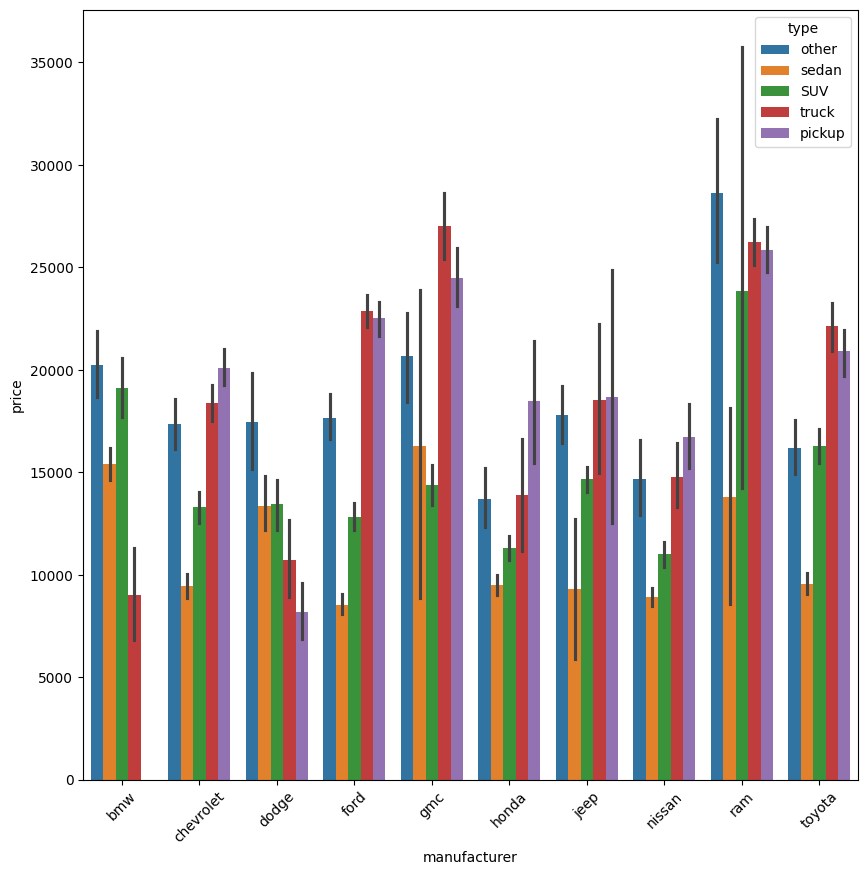

In [ ]:
# lets compare the same above for type of vehicle
avg_price = data.groupby(['manufacturer', 'model', 'year', 'type'])['price'].mean().reset_index()
# lets look at the top 5 types
top_type = avg_price['type'].value_counts().head(5).index
avg_price = avg_price[avg_price['type'].isin(top_type)]
# plot average price for type, for each manufacturer

plt.figure(figsize=(10,10))
sns.barplot(x='manufacturer', y='price', hue='type', data=avg_price)
plt.xticks(rotation=45)
plt.show()


- pickups, trucks and SUVs have the highest prices, sedans seem to command less prices

In [ ]:
# distinct types of cylinders
data['cylinders'].value_counts()

<Figure size 1000x1000 with 0 Axes>

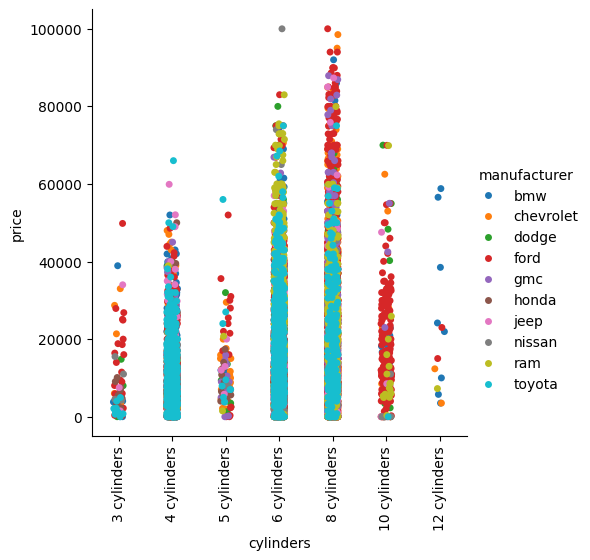

In [396]:
# For each manufacturer and model, fuel_type, list average price
avg_price = data.groupby(['manufacturer', 'model', 'cylinders'])['price'].mean().reset_index()

# plot order = 3 cylinders, 4 cylinders, 5 cylinders, 6 cylinders, 8 cylinders, 10 cylinders, 12 cylinders
avg_price['cylinders'] = pd.Categorical(avg_price['cylinders'], categories=['3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', '10 cylinders', '12 cylinders'], ordered=True)

plt.figure(figsize=(10,10))
sns.catplot(x='cylinders', y='price', hue='manufacturer', data=avg_price)
plt.xticks(rotation=90)
plt.show()


- there is a lot of vehicles for 4, 6 and 8 cylinders and have higher prices. There are not many 3, 5, 12  cylinder vehicles. 

<Figure size 1000x1000 with 0 Axes>

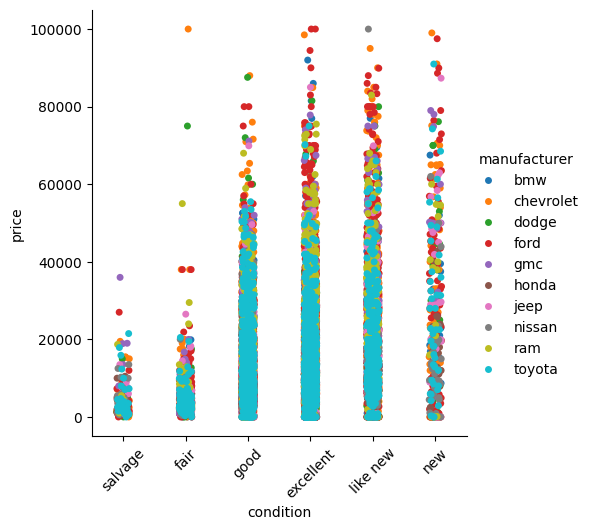

In [397]:
# For each manufacturer and model, condition, list average price
avg_price = data.groupby(['manufacturer', 'model', 'condition'])['price'].mean().reset_index()

# plot order = 3 cylinders, 4 cylinders, 5 cylinders, 6 cylinders, 8 cylinders, 10 cylinders, 12 cylinders
avg_price['condition'] = pd.Categorical(avg_price['condition'], categories=['salvage', 'fair', 'good', 'excellent', 'like new', 'new'], ordered=True)

plt.figure(figsize=(10,10))
sns.catplot(x='condition', y='price', hue='manufacturer', data=avg_price)
plt.xticks(rotation=45)
plt.show()

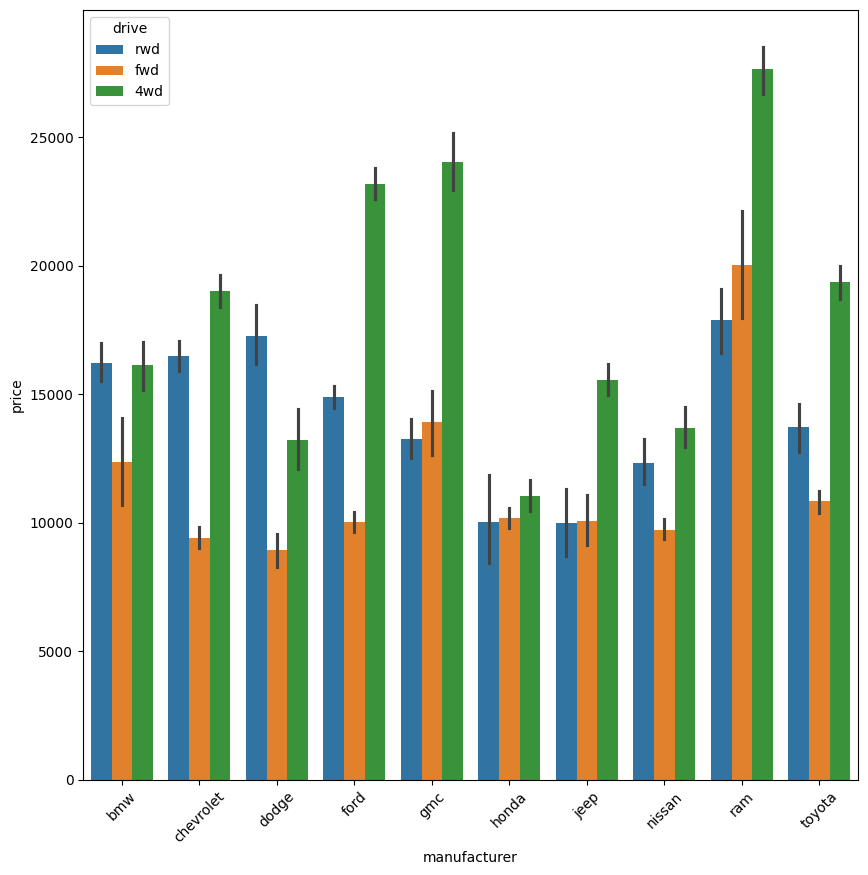

In [407]:
# # For each manufacturer and model, condition, list average price
# avg_price = data.groupby(['manufacturer', 'model', 'drive'])['price'].mean().reset_index()

# # plot order = 3 cylinders, 4 cylinders, 5 cylinders, 6 cylinders, 8 cylinders, 10 cylinders, 12 cylinders
# avg_price['drive'] = pd.Categorical(avg_price['drive'], categories=['fwd', 'rwd', '4wd'], ordered=True)

# plt.figure(figsize=(10,10))
# sns.catplot(x='drive', y='price', hue='manufacturer', data=avg_price)
# plt.xticks(rotation=45)
# plt.show()

# lets compare the same above for type of vehicle
avg_price = data.groupby(['manufacturer', 'model', 'year', 'drive'])['price'].mean().reset_index()
# lets look at the top 5 types
top_type = avg_price['drive'].value_counts().head(5).index
avg_price = avg_price[avg_price['drive'].isin(top_type)]
# plot average price for type, for each manufacturer

plt.figure(figsize=(10,10))
sns.barplot(x='manufacturer', y='price', hue='drive', data=avg_price)
plt.xticks(rotation=45)
plt.show()

- Ford, GMC, Dodge Ram, Chevy all command more prices for their 4wd vehicles
- Fwd vehicles are the cheapest of the 3

In [ ]:
# remove columns that are not useful - VIN
# for this analysis we will assume location is not important.. drop region and state
data.drop(['VIN', 'region', 'state'], axis=1, inplace=True)

In [ ]:
data.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,7222695916,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7218891961,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7221797935,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7222270760,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7210384030,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check missing values
data.isnull().sum()


id                   0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64

In [ ]:
# lets analyze the missing values in the columns

# missing values in cylinders
data['cylinders'].value_counts()

# missing values in fuel
data['fuel'].value_counts()

# missing values in odometer
data['odometer'].value_counts()

# missing values in title_status
data['title_status'].value_counts()

# missing values in transmission
# data['transmission'].value_counts()

# missing values in drive
data['drive'].value_counts()

# missing values in size
data['size'].value_counts()

# missing values in type
#data['type'].value_counts()

# missing values in paint_color
data['paint_color'].value_counts()


paint_color
white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: count, dtype: int64

In [ ]:
# transmission has a significant "other" category that needs better understanding. Lets drop this column
data.drop('transmission', axis=1, inplace=True)


In [ ]:
data.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,size,type,paint_color
0,7222695916,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7218891961,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7221797935,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7222270760,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7210384030,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# lets analyze the missing values in the columns
data.isnull().sum()

id                   0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64

In [ ]:
# too many null values in size. Lets drop this column
data.drop('size', axis=1, inplace=True)

In [ ]:
data.shape

(426880, 13)

In [ ]:
# condition is important. Lets drop rows with missing values in condition
data.dropna(subset=['condition'], inplace=True)

In [ ]:
data.shape

(252776, 13)

In [ ]:
data.isnull().sum()

id                  0
price               0
year               10
manufacturer    10825
model            2274
condition           0
cylinders       71280
fuel               16
odometer         1915
title_status     5483
drive           60920
type            32775
paint_color     51681
dtype: int64

In [ ]:
data.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,type,paint_color
27,7316814884,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,NaN,pickup,white
28,7316814758,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,NaN,pickup,blue
29,7316814989,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,NaN,pickup,red
30,7316743432,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,NaN,pickup,red
31,7316356412,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,rwd,truck,black


In [ ]:
# we need to group prices into bins.. lets see the distribution of prices
# lets pull together datasets by "type"
data['type'].value_counts()

# lets drop rows with missing values in type
data.dropna(subset=['type'], inplace=True)

data.shape


(220001, 13)

In [ ]:
data_grouped = data.groupby('type')['price'].mean().reset_index()

# counts by type
data_grouped_count = data.groupby('type')['price'].count().reset_index()
data_grouped_count

,type,price
0,SUV,46473
1,bus,397
2,convertible,5854
3,coupe,15140
4,hatchback,13449
5,mini-van,3849
6,offroad,601
7,other,14485
8,pickup,27190
9,sedan,59284


In [ ]:
data_grouped.columns

Index(['type', 'price'], dtype='object')

In [ ]:
# remove rows that have condition as "new".. we only want used cars
data = data[data['condition'] != 'new']

In [ ]:
data_grouped_SUV = data[data['type'] == 'SUV']
data_grouped_SUV


,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,type,paint_color
46,7315039307,0,2011.0,jeep,compass,excellent,NaN,gas,99615.0,clean,NaN,SUV,NaN
49,7314811916,32990,2020.0,jeep,wrangler sport suv 2d,good,NaN,gas,20581.0,clean,4wd,SUV,silver
72,7312313815,33990,2017.0,jeep,wrangler unlimited sahara,good,6 cylinders,other,34152.0,clean,4wd,SUV,white
76,7311818189,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,4wd,SUV,blue
92,7309828117,19990,2015.0,infiniti,qx60 3.5 sport utility,good,NaN,other,96003.0,clean,NaN,SUV,silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426817,7302488878,20590,2018.0,ford,edge se sport utility 4d,good,NaN,gas,37164.0,clean,fwd,SUV,black
426823,7302487313,37590,2018.0,mercedes-benz,gle 350 sport,good,6 cylinders,gas,16482.0,clean,rwd,SUV,black
426857,7301954392,41990,2019.0,toyota,4runner limited sport,good,6 cylinders,gas,36630.0,clean,4wd,SUV,white
426864,7301949196,29590,2016.0,toyota,4runner sr5 sport utility,good,6 cylinders,gas,53475.0,clean,NaN,SUV,black


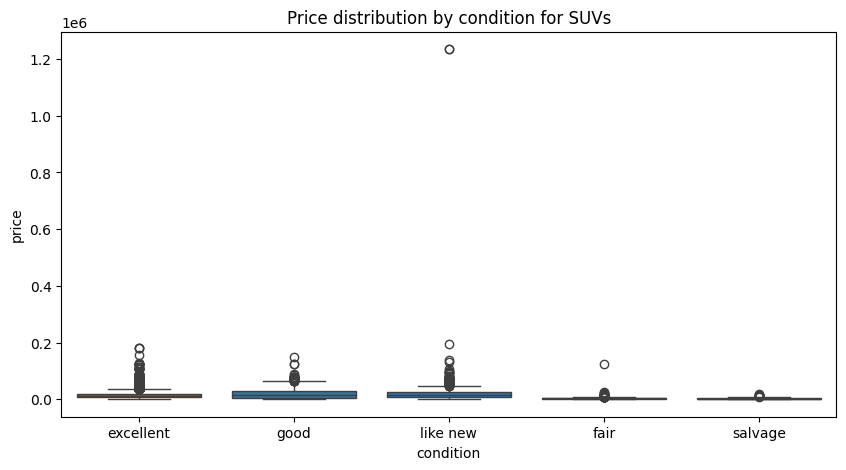

In [ ]:
# lets now plot the price distribution by condition for SUVs
plt.figure(figsize=(10, 5))
sns.boxplot(x='condition', y='price', data=data_grouped_SUV)
plt.title('Price distribution by condition for SUVs')
plt.show()


In [ ]:
# lets remove outliers
data_grouped_SUV = data_grouped_SUV[(data_grouped_SUV['price'] > 1000) & (data_grouped_SUV['price'] < 100000)]


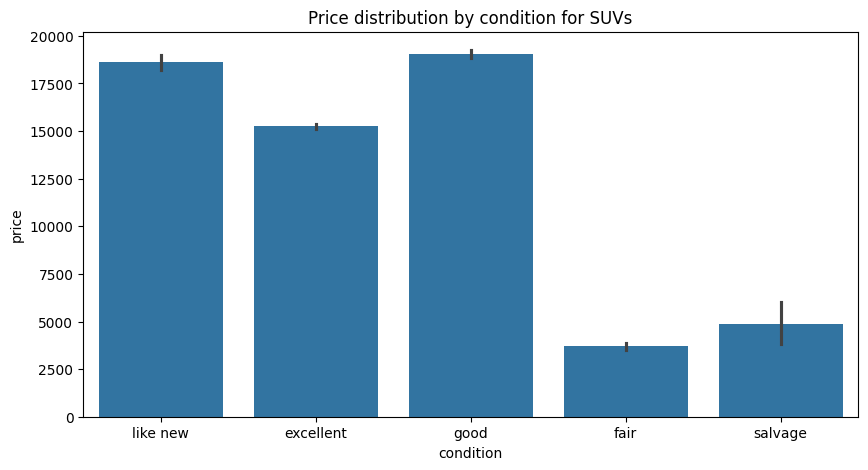

In [ ]:
# set the order of the plot
plt.figure(figsize=(10, 5))
sns.barplot(x='condition', y='price', data=data_grouped_SUV, order=['like new', 'excellent', 'good', 'fair', 'salvage'])
plt.title('Price distribution by condition for SUVs')
plt.show()

- Fair and Salvage Conditions are clearly low priced
- Excellent, Good or Like new dont seem to be much difference.

In [ ]:
# counts of each condition
data_grouped_SUV['condition'].value_counts()

condition
excellent    21795
good         16180
like new      3847
fair           840
salvage         60
Name: count, dtype: int64

- it appears there are fewer "like new" cars - compared to excellent and good cars


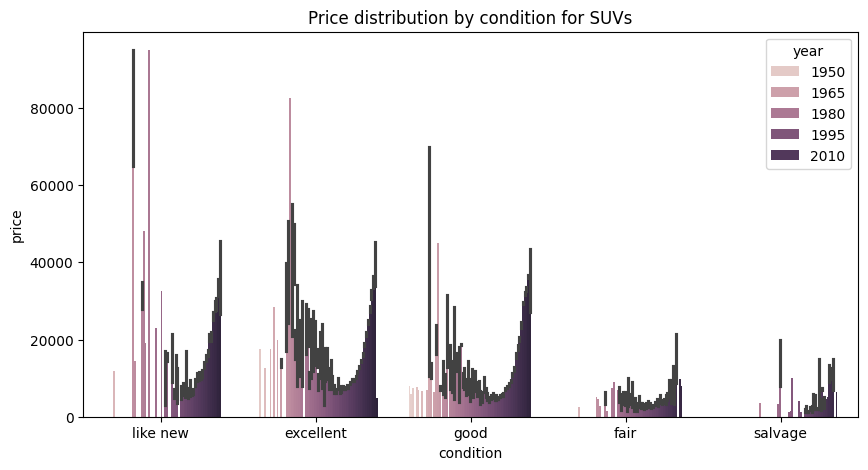

In [ ]:
# lets now color the plot by year

plt.figure(figsize=(10, 5))
sns.barplot(x='condition', y='price', data=data_grouped_SUV, order=['like new', 'excellent', 'good', 'fair', 'salvage'], hue='year')
plt.title('Price distribution by condition for SUVs')
plt.show()

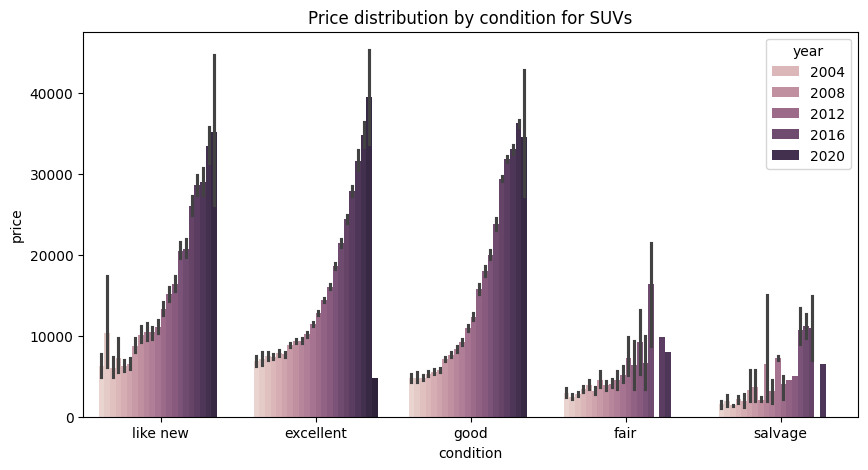

In [ ]:
# lets remove data older than 2000
data_grouped_SUV = data_grouped_SUV[data_grouped_SUV['year'] > 2000]

plt.figure(figsize=(10, 5))
sns.barplot(x='condition', y='price', data=data_grouped_SUV, order=['like new', 'excellent', 'good', 'fair', 'salvage'], hue='year')
plt.title('Price distribution by condition for SUVs')
plt.show()

In [ ]:
# group condition and year and count the number of cars
data_grouped_SUV = data_grouped_SUV.groupby(['condition', 'year'])['price'].count().reset_index()
data_grouped_SUV



,condition,year,price
0,excellent,2001.0,214
1,excellent,2002.0,266
2,excellent,2003.0,433
3,excellent,2004.0,590
4,excellent,2005.0,689
...,...,...,...
95,salvage,2014.0,1
96,salvage,2015.0,3
97,salvage,2016.0,4
98,salvage,2017.0,2


C:\Users\prao5\AppData\Local\Temp\ipykernel_23192\1678737494.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



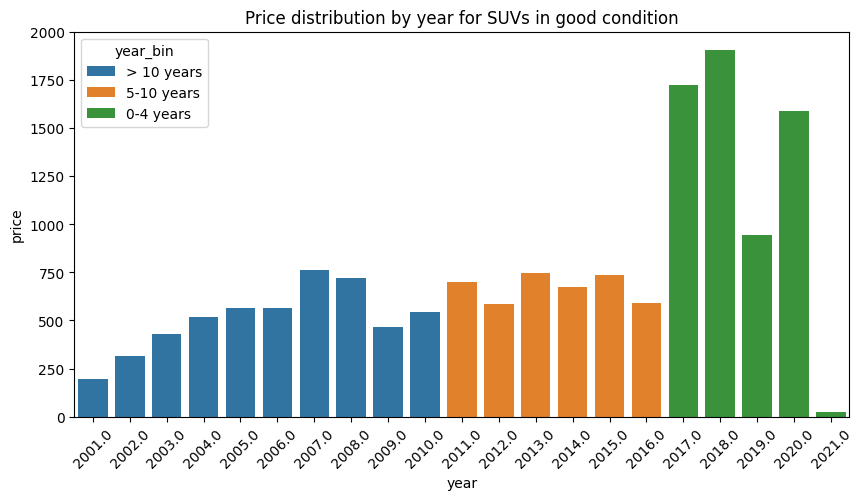

In [ ]:
# now lets take one condition and dig deeper
data_grouped_SUV_good = data_grouped_SUV[data_grouped_SUV['condition'] == 'good']

# lets classify the data into bins - by years
# if latest year -3 years, then "0-3 years"
# if 4-6 years, then "4-6 years"
# if 7-10 years, then "7-10 years"
# if >10 years, then "> 10 years"

data_grouped_SUV_good['year_bin'] = pd.cut(data_grouped_SUV_good['year'], bins=[2000, 2010, 2016, 2021], labels=['> 10 years', '5-10 years', '0-4 years'])

# 

# lets plot the price distribution by year for SUVs in good condition, and color by year bins
plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='price', data=data_grouped_SUV_good, hue='year_bin')
plt.title('Price distribution by year for SUVs in good condition')
x = plt.xticks(rotation=45)
plt.show()



- The price is the best in the first 5 years. Drops significantly beyond 5 years for SUVs
- 

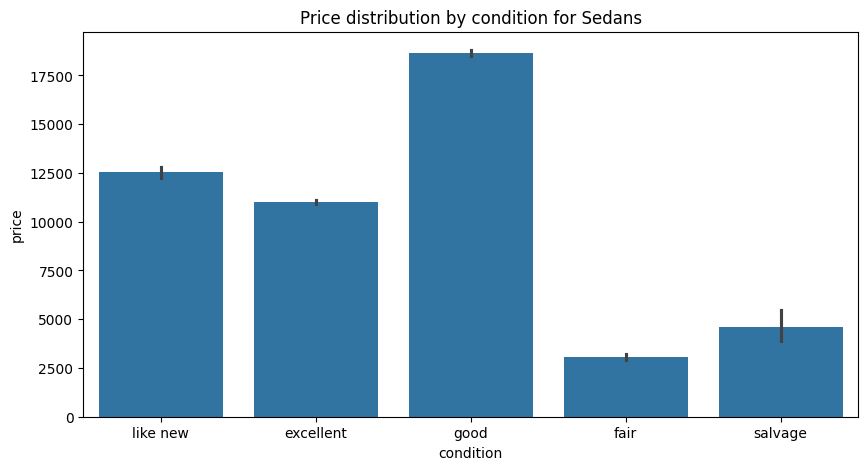

In [ ]:

data_grouped_sedan = data[data['type'] == 'sedan']


# why are like new cars cheaper than excellent cars??

# lets remove outliers
data_grouped_sedan = data_grouped_sedan[(data_grouped_sedan['price'] > 1000) & (data_grouped_sedan['price'] < 100000)]

# set the order of the plot
plt.figure(figsize=(10, 5))
sns.barplot(x='condition', y='price', data=data_grouped_sedan, order=['like new', 'excellent', 'good', 'fair', 'salvage'])
plt.title('Price distribution by condition for Sedans')
plt.show()

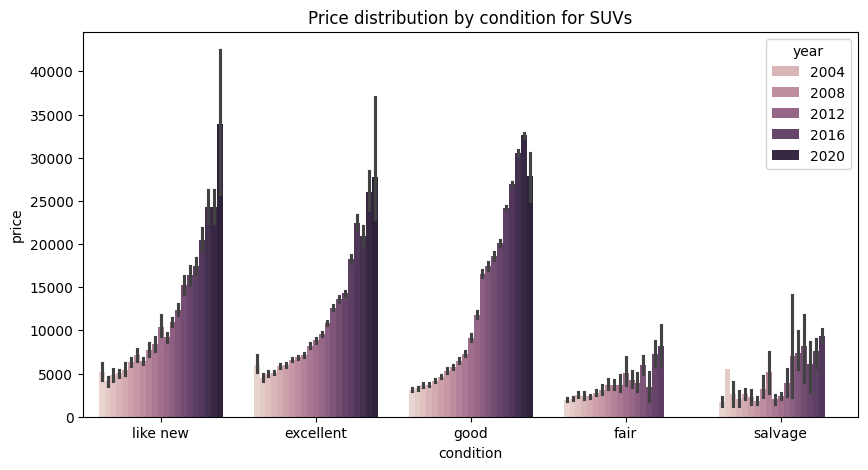

In [ ]:
# lets remove data older than 2000
data_grouped_sedan = data_grouped_sedan[data_grouped_sedan['year'] > 2000]

plt.figure(figsize=(10, 5))
sns.barplot(x='condition', y='price', data=data_grouped_sedan, order=['like new', 'excellent', 'good', 'fair', 'salvage'], hue='year')
plt.title('Price distribution by condition for SUVs')
plt.show()

- It appears the pattern for condition is identical between SUVs and Sedans - the two largest sets of data

C:\Users\prao5\AppData\Local\Temp\ipykernel_23192\142924876.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



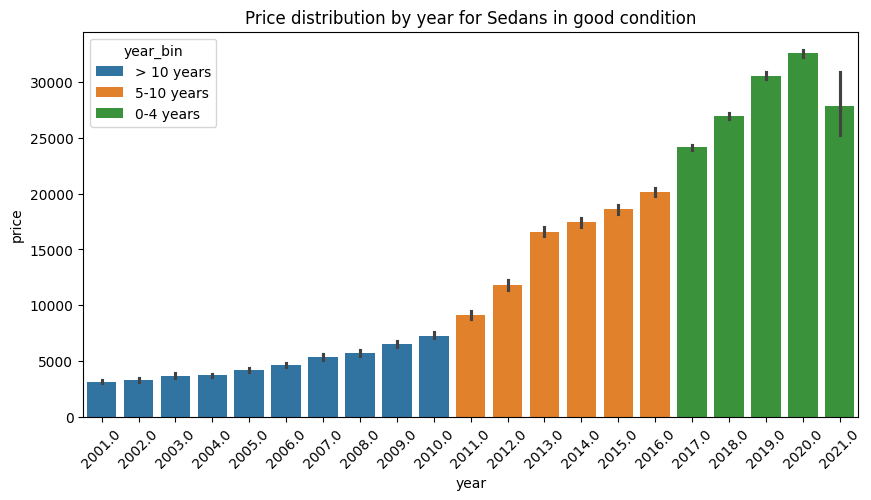

In [ ]:
# Now lets take good condition and analyze how price varies by year
data_grouped_sedan_good = data_grouped_sedan[data_grouped_sedan['condition'] == 'good']

# lets classify the data into bins - by years
# if latest year -3 years, then "0-3 years"
# if 4-6 years, then "4-6 years"
# if 7-10 years, then "7-10 years"
# if >10 years, then "> 10 years"

data_grouped_sedan_good['year_bin'] = pd.cut(data_grouped_sedan_good['year'], bins=[2000, 2010, 2016, 2021], labels=['> 10 years', '5-10 years', '0-4 years'])

# lets plot the price distribution by year for SUVs in good condition, and color by year bins
plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='price', data=data_grouped_sedan_good, hue='year_bin')
plt.title('Price distribution by year for Sedans in good condition')
x = plt.xticks(rotation=45)
plt.show()



In [ ]:
# Lets determine the regression model for price
# lets first encode the categorical variables
data.head()

data['type'].value_counts()

data['type'] = data['type'].astype('category')
data['type'] = data['type'].cat.codes

data['condition'].value_counts()

data['condition'] = data['condition'].astype('category')
data['condition'] = data['condition'].cat.codes

data['fuel'].value_counts()

data['fuel'] = data['fuel'].astype('category')
data['fuel'] = data['fuel'].cat.codes

data['drive'].value_counts()

data['drive'] = data['drive'].astype('category')
data['drive'] = data['drive'].cat.codes

data['paint_color'].value_counts()

data['paint_color'] = data['paint_color'].astype('category')
data['paint_color'] = data['paint_color'].cat.codes

data['title_status'].value_counts()

data['title_status'] = data['title_status'].astype('category')
data['title_status'] = data['title_status'].cat.codes

data.head()



,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,drive,type,paint_color
27,7316814884,33590,2014.0,gmc,sierra 1500 crew cab slt,2,8 cylinders,2,57923.0,0,-1,8,10
28,7316814758,22590,2010.0,chevrolet,silverado 1500,2,8 cylinders,2,71229.0,0,-1,8,1
29,7316814989,39590,2020.0,chevrolet,silverado 1500 crew,2,8 cylinders,2,19160.0,0,-1,8,8
30,7316743432,30990,2017.0,toyota,tundra double cab sr,2,8 cylinders,2,41124.0,0,-1,8,8
31,7316356412,15000,2013.0,ford,f-150 xlt,0,6 cylinders,2,128000.0,0,2,10,0


In [ ]:
# remove manufacturer, model and cylinders
# data.drop(['manufacturer', 'model', 'cylinders'], axis=1, inplace=True)

# drop na values
data.dropna(inplace=True)


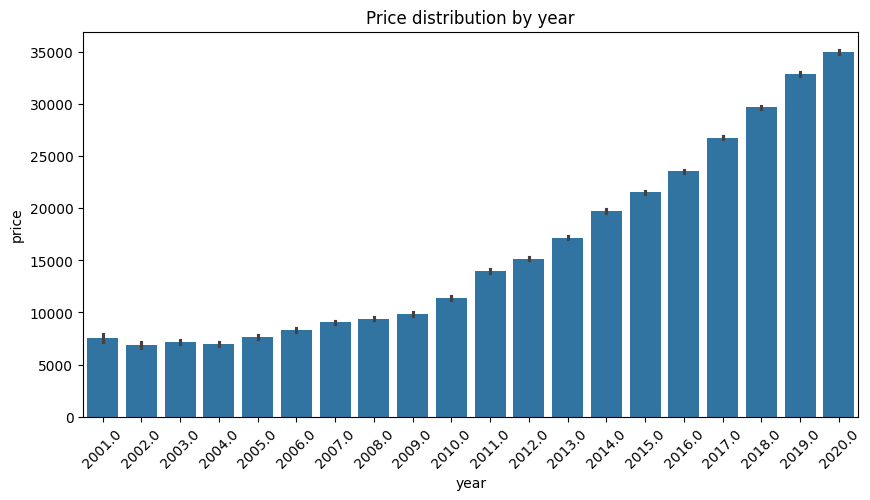

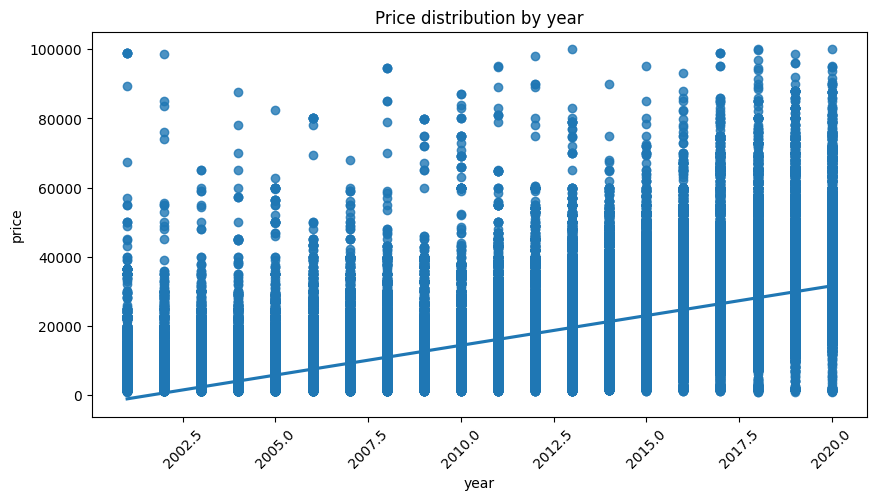

In [ ]:
# lets get data only for the past 20 years
data = data[data['year'] > 2000]

# drop outliers
data = data[(data['price'] > 1000) & (data['price'] < 100000)]

# only for full years.. lets drop the 2021 data
data = data[data['year'] < 2021]

# plot the price distribution by year
plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='price', data=data)
plt.title('Price distribution by year')
x = plt.xticks(rotation=45)
plt.show()

# overlay the linear regression model
plt.figure(figsize=(10, 5))
sns.regplot(x='year', y='price', data=data)
plt.title('Price distribution by year')
x = plt.xticks(rotation=45)
plt.show()





In [ ]:
# lets do a quadratic regression model
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# lets predict the price
y_pred = model.predict(X_test)

# lets evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print('Mean Squared Error: ', mse)

print('R2 Score: ', r2)


Mean Squared Error:  84025760.36500593
R2 Score:  0.5000909311745085


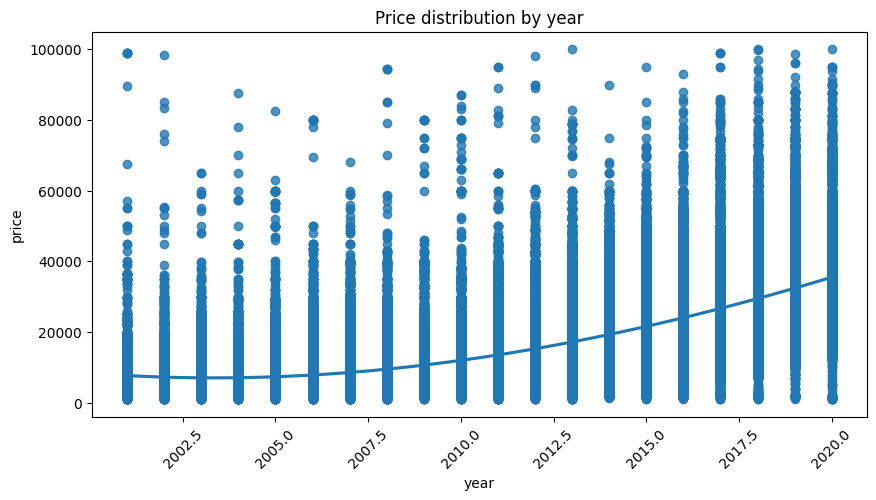

In [ ]:
# plot the polynomial regression model
plt.figure(figsize=(10, 5))
sns.regplot(x='year', y='price', data=data, order=3)
plt.title('Price distribution by year')
x = plt.xticks(rotation=45)
plt.show()


In [ ]:
data.head()

,id,price,year,odometer,type_0,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8,type_9,type_10,type_11,type_12,condition_0,condition_1,condition_2,condition_3,condition_4,fuel_0,fuel_1,fuel_2,fuel_3,fuel_4,drive_0,drive_1,drive_2,drive_3,paint_color_-1,paint_color_0,paint_color_1,paint_color_2,paint_color_3,paint_color_4,paint_color_5,paint_color_6,paint_color_7,paint_color_8,paint_color_9,paint_color_10,paint_color_11,title_status_-1,title_status_0,title_status_1,title_status_2,title_status_3,title_status_4,title_status_5
27,7316814884,33590,2014.0,57923.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
28,7316814758,22590,2010.0,71229.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
29,7316814989,39590,2020.0,19160.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
30,7316743432,30990,2017.0,41124.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
31,7316356412,15000,2013.0,128000.0,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [ ]:
# convert categorical variables to one hot encoding
data = pd.get_dummies(data, columns=['type', 'condition', 'fuel', 'drive', 'paint_color', 'title_status'])

data.head()


,id,price,year,odometer,type_0,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8,type_9,type_10,type_11,type_12,condition_0,condition_1,condition_2,condition_3,condition_4,fuel_0,fuel_1,fuel_2,fuel_3,fuel_4,drive_0,drive_1,drive_2,drive_3,paint_color_-1,paint_color_0,paint_color_1,paint_color_2,paint_color_3,paint_color_4,paint_color_5,paint_color_6,paint_color_7,paint_color_8,paint_color_9,paint_color_10,paint_color_11,title_status_-1,title_status_0,title_status_1,title_status_2,title_status_3,title_status_4,title_status_5
27,7316814884,33590,2014.0,57923.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
28,7316814758,22590,2010.0,71229.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
29,7316814989,39590,2020.0,19160.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
30,7316743432,30990,2017.0,41124.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
31,7316356412,15000,2013.0,128000.0,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [ ]:
from sklearn.decomposition import PCA
from scipy.linalg import svd

In [ ]:
data_scaled = (data - data.mean())/data.std()

#Preparation for PCA
U, sigma, VT = svd(data_scaled, full_matrices=False)
percent_variance_explained = sigma/sigma.sum()
cumulative_variance_ratio = np.cumsum(sigma)/sigma.sum()

#Identify number of components needed to achieve at least 80% variance
num_of_components_over_80pct_variance = int((np.cumsum(percent_variance_explained) < .8).sum())
print(f"Number of components needed to achieve at least 80% variance: {num_of_components_over_80pct_variance}")

Number of components needed to achieve at least 80% variance: 33


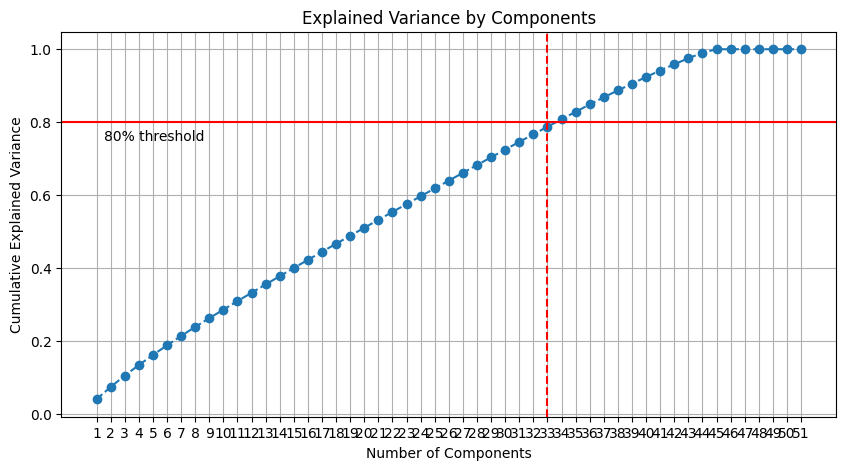

In [ ]:
# Plot the explained variance
plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.75, '80% threshold')
plt.axvline(x=num_of_components_over_80pct_variance-1, color='r', linestyle='--')
plt.xticks(np.arange(len(cumulative_variance_ratio)), np.arange(1, len(cumulative_variance_ratio)+1))
plt.grid(True)

plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
#Extracting the Components
pca = PCA(n_components = num_of_components_over_80pct_variance)
pca.fit(data_scaled)
components = pca.transform(data_scaled)

# The loadings are the components_ attribute of the PCA object, but these need to be scaled by the square root of the eigenvalues (explained_variance_)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame of loadings with rows corresponding to features and columns to components
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=data.columns)
loading_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33
id,-0.149672,0.002248,0.056119,-0.044322,0.008645,-0.024740,-0.051567,0.188572,0.064488,0.303484,0.101144,-0.184970,0.009636,0.259699,0.299420,0.275516,-0.171598,-0.122860,-0.141283,0.154096,0.090782,-0.089279,0.232336,0.089591,-0.190484,-0.098832,0.008298,-0.066457,-0.000420,0.016275,0.253418,0.059904,0.099327
price,0.687032,-0.385647,-0.038916,0.042346,0.168977,-0.035192,0.313527,-0.030406,0.012326,0.031877,-0.002201,-0.058613,-0.099030,0.032340,-0.027364,0.012924,0.059052,0.026164,-0.019481,-0.032669,-0.037613,0.013468,-0.002858,-0.016167,0.035111,-0.012906,-0.017954,-0.007777,0.050450,0.016226,0.002803,-0.009032,0.004077
year,0.618930,-0.012864,-0.269861,0.160641,0.068012,-0.082899,0.479898,-0.004889,-0.067964,-0.033460,0.045368,-0.048386,-0.055418,0.030643,-0.043195,-0.026773,0.075576,-0.036104,-0.014224,-0.017304,-0.026702,-0.035848,-0.014880,-0.044585,0.020483,0.016924,-0.013781,0.004476,0.040967,0.005996,-0.020445,0.027781,-0.000193
odometer,-0.428096,-0.072060,0.222580,-0.139510,-0.178470,0.076810,-0.395058,0.085476,0.065232,-0.084397,-0.089749,0.003007,0.113269,-0.023017,0.031737,-0.033987,0.010974,0.008416,-0.061048,0.015764,0.045090,-0.070528,-0.044993,0.048709,-0.012083,0.015506,-0.035815,-0.038639,-0.078241,-0.050595,-0.022363,-0.046277,0.021554
type_0,-0.257819,-0.273524,-0.036407,0.498401,-0.112971,-0.083864,-0.081264,-0.249430,-0.195680,-0.363619,0.021611,0.236680,-0.002935,-0.082618,0.030844,-0.088570,0.037327,-0.029377,0.060210,0.271587,0.062217,-0.041853,0.058817,-0.073679,-0.008334,0.001593,-0.016635,-0.100010,-0.012176,0.014827,0.047547,-0.001454,-0.089568
type_1,0.002748,-0.031593,0.053695,-0.117801,0.030340,0.075570,-0.039522,-0.029167,-0.016512,-0.018555,0.052881,0.073917,0.051850,0.018094,0.116093,0.204043,0.161652,-0.321864,0.202043,0.265782,-0.409130,-0.064090,-0.223980,0.020717,0.009981,0.165512,0.079144,0.059421,-0.054396,-0.015717,0.082763,0.282639,-0.090550
type_2,-0.029781,0.030825,0.044983,-0.090963,0.254035,0.061957,-0.113084,-0.202882,-0.002776,0.079366,0.058446,0.067817,-0.028817,0.010801,0.036962,0.141616,-0.217024,0.480197,0.413442,0.050313,-0.007077,0.330468,-0.194345,0.151645,0.117109,-0.131232,0.048603,0.101263,0.024390,-0.103594,0.033212,-0.022873,0.059587
type_3,0.096051,0.075143,0.040297,-0.124235,0.455136,-0.031650,-0.132833,-0.379055,-0.073052,0.165767,0.104045,0.053313,-0.033540,-0.045989,-0.031621,-0.015578,0.171857,-0.234430,-0.250508,-0.222269,0.077234,-0.130043,0.170327,-0.114106,-0.039833,0.072668,-0.042752,-0.114564,0.042478,-0.019110,-0.024168,-0.096611,-0.230102
type_4,0.100705,0.250069,-0.070988,-0.073429,-0.310963,-0.051901,0.033743,-0.200599,-0.447618,0.094129,0.143079,-0.146912,0.153665,0.038261,0.141160,-0.137479,-0.139411,0.138043,-0.192978,-0.026579,-0.208035,0.095468,-0.112835,0.038729,-0.062609,0.109557,0.100925,0.111333,-0.044964,-0.090771,-0.091025,-0.201297,0.037235
type_5,-0.135335,0.143999,0.020058,-0.024842,-0.060295,-0.004825,-0.026957,0.119516,-0.108916,0.130652,-0.034964,0.009107,0.071322,0.075294,0.163326,0.047483,0.586096,0.247384,0.008648,-0.160601,-0.079395,0.126750,0.119332,0.182069,0.109667,-0.073990,-0.018510,-0.273057,0.316239,0.123197,-0.010740,0.075579,-0.099682


In [ ]:
# Sort the features with the highest loadings for each component
sorted_indices = {f'PC{i+1}': loading_matrix[f'PC{i+1}'].abs().sort_values(ascending=False).index
                  for i in range(loading_matrix.shape[1])}

#select the top 3 features for each component
loading_matrix_sorted_all = pd.DataFrame(sorted_indices)
loading_matrix_sorted_all = loading_matrix_sorted_all[:3]

loading_matrix_sorted_all

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33
0,condition_2,drive_2,title_status_0,type_0,drive_3,paint_color_-1,year,paint_color_10,type_9,paint_color_8,condition_4,paint_color_9,paint_color_0,paint_color_9,condition_3,paint_color_1,type_5,type_2,type_2,type_7,paint_color_5,paint_color_5,paint_color_2,paint_color_3,title_status_1,title_status_1,paint_color_7,paint_color_6,title_status_2,type_6,paint_color_4,paint_color_6,type_11
1,price,drive_1,title_status_-1,fuel_0,fuel_2,title_status_4,odometer,type_8,paint_color_0,type_8,title_status_5,paint_color_0,paint_color_9,type_7,paint_color_1,paint_color_8,fuel_1,type_1,type_12,type_12,type_1,title_status_3,paint_color_4,title_status_2,paint_color_7,paint_color_7,title_status_3,title_status_2,fuel_1,title_status_3,fuel_1,type_12,fuel_3
2,year,type_9,paint_color_-1,fuel_2,type_3,title_status_5,condition_1,type_3,type_4,type_0,type_8,title_status_4,condition_4,paint_color_1,type_12,id,type_2,type_12,paint_color_3,fuel_1,paint_color_2,type_6,paint_color_3,paint_color_6,type_6,type_6,paint_color_2,paint_color_4,type_5,paint_color_7,title_status_1,type_1,paint_color_11


In [ ]:
# explain the results of the pca
# PC1: condition_2, price, year
# PC2: title_status_-1, drive_1, type_9
# PC3: type_0, title_status_0, paint_color_-1

# lets build a regression model using the PCA components
X = components
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# lets predict the price
y_pred = model.predict(X_test)

# lets evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print('Mean Squared Error: ', mse)

print('R2 Score: ', r2)



Mean Squared Error:  34906848.71547186
R2 Score:  0.7923226143842036


In [ ]:
from sklearn.cluster import KMeans, DBSCAN

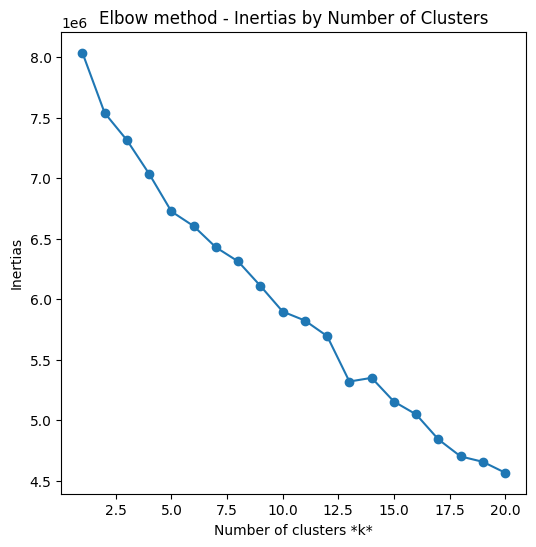

In [ ]:
#Identify the inertias for different number of clusters
inertias = []
for i in range(1, 21): # 1 to 20 clusters
    kmeans = KMeans(n_clusters = i, n_init='auto').fit(components)
    inertias.append(kmeans.inertia_)

#Plot the inertias for different number of clusters to identify the elbow
plt.figure(figsize=(6, 6))
plt.plot(range(1,21), inertias, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('Inertias')
plt.title('Elbow method - Inertias by Number of Clusters')
plt.show()

### Findings

Per the principal component analysis, we identified that 3 components are needed to achieve at least 80% variance. We then extracted the components and identified the top 3 features for each component. The top 3 features for each component are as follows:

1. Condition of the Used Car - Good, Excellent, Like New are priced higher than others. Others drop values significantly
2. Year - The recent 5 years hold the most value. Price drops significantly after 5 years
3. Title status - Salvage and Rebuilt titles hold very little value
4. Type of vehicle - SUV / Sedan etc - class of vehicle matters
5. Paint color - white color seems to be the most popular. Rare colors such as green, purple hold less value


### Exceptions to Pricing 

1. Trucks, Pickups, SUVs are able to be priced higher than sedans, convertibles, hatchbacks and other types of vehicles
2. Ford, Chevy, Toyota are top 3 vehicles on the used car market. Their diesel vehicles are higher priced than the gas, and other fuel vehicles
3. 4, 6, and 8 cylinders have larger number of vehicles and may be more popular than other cylinders
4. Ford, GMC, Dodge Ram, Chevy all command more prices for their 4wd vehicles. Fwd vehicles are the cheapest of the 3 types